# This jupyter notebook is prepared by “Daniel Cisneros”.

---
## **1. Load Data and perform basic EDA**
---

### **I.** import libraries necessary libraries 

In [1]:
  # Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import missingno as msno
import scipy.stats as st
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

### **II.**  import the data to a dataframe and show the count of rows and columns (1 pt)

In [2]:
data = pd.read_csv("hrdata3.csv")
print("Number of rows: ", len(data))
print("Number of columns: ",len(data.columns), "\n") 
print("\nTotal matrix: ", data.shape)

Number of rows:  12977
Number of columns:  8 


Total matrix:  (12977, 8)


### **III.** Show the top 5 and last 5 rows (1 pt)

In [3]:
data.head()

,Unnamed: 0,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
0,1,29725,0.776,15,2,5,47,0.0
1,4,666,0.767,21,2,4,8,0.0
2,6,28806,0.920,5,2,1,24,0.0
3,7,402,0.762,13,0,5,18,1.0
4,8,27107,0.920,7,2,1,46,1.0


In [4]:
data.tail()

,Unnamed: 0,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
12972,19149,251,0.920,9,2,1,36,1.0
12973,19150,32313,0.920,10,3,3,23,0.0
12974,19152,29754,0.920,7,1,1,25,0.0
12975,19155,24576,0.920,21,2,4,44,0.0
12976,19156,5756,0.802,0,4,2,97,0.0


### **IV.** Is there any null values on any column?

In [5]:
nulls = data.isnull().sum().to_frame("nulls")
nulls

,nulls
Unnamed: 0,0
enrollee_id,0
city_development_index,0
experience,0
company_size,0
last_new_job,0
training_hours,0
target,0


##### **Discussion:** There is no null values 

### **V.** Are all the columns numeric such as float or int? If not, please convert them to numeric (int/float) before going to the next step.

In [6]:
numerical_features = data.select_dtypes(include = [np.number])
numerical_features.columns

Index(['Unnamed: 0', 'enrollee_id', 'city_development_index', 'experience',
       'company_size', 'last_new_job', 'training_hours', 'target'],
      dtype='object')

##### **No need to do conversion**

### **VI.** plot the heatmap with correlations to get some more idea about the data.

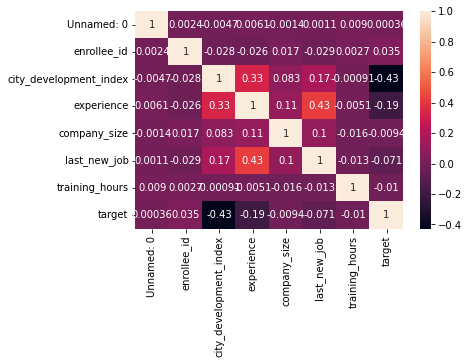

In [7]:
correlation = numerical_features.corr()
sns.heatmap(correlation, annot = True)

---
##  **2. Feature Selection and Pre-processing**
---

### **I.** Put all the data from the dataframe into X, except the enrolle_id and the target columns

In [8]:
X = data[['city_development_index', 'experience', 'company_size', 'last_new_job', 'training_hours']]

### **II.** Perform feature scaling on the data of X with StandardScaler and show some sample data from X after scaling (Use the technique shown in the second answer from this post: https://stackoverflow.com/questions/44552031/sklearnstandardscaler-can-i-inverse-the-standardscaler-for-the-model-output (Links to an external site.) )

In [9]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_scaled

array([[-0.50342203,  0.63395707, -0.5747232 ,  1.69076217, -0.30839586],
       [-0.57841303,  1.54600905, -0.5747232 ,  1.08113696, -0.95180478],
       [ 0.69643399, -0.88612956, -0.5747232 , -0.74773864, -0.68784215],
       ...,
       [ 0.69643399, -0.58211224, -1.0314958 , -0.74773864, -0.67134448],
       [ 0.69643399,  1.54600905, -0.5747232 ,  1.08113696, -0.35788885],
       [-0.28678136, -1.64617288,  0.338822  , -0.13811344,  0.51648738]])

---
## **3. KMeans Clustering**
---

### **I.** Import related library for Kmeans and perform Kmeans on X (note that it was scaled already). Make sure to put random_state = 47 (it can be any number, but use 47 so that you will produce almost the same result as us). Use k-means++ for the initial centroids. You should know from the problem description how many clusters we are interested in.

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state=47)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=47)

### **II.** Show the cluster centers as it is and then inverse the scale and show the centers. Please explain in words about the centers relating them to the columns of the data set

In [11]:
center = kmeans.cluster_centers_
center

array([[-0.31364817, -0.63941844, -0.15207764, -0.55076921,  0.01170319],
       [ 0.44177356,  0.90062111,  0.21420141,  0.77575864, -0.01648395]])

In [12]:
center_inverse = scaler.inverse_transform(center)
center_inverse

array([[ 0.7987756 ,  6.62300698,  2.9252866 ,  1.32309922, 66.4026881 ],
       [ 0.88943708, 16.75426875,  3.72717149,  3.49907201, 64.69413512]])

##### **Explanation:** This cluster center represents the value average for our data set which represents city development, experience, company size, last new job, and training hours

### **III.** Show the distance matrix

In [13]:
kmeans.transform(X_scaled)

array([[2.6387601 , 1.58409296],
       [2.93535149, 1.74579189],
       [1.3371321 , 2.57904978],
       ...,
       [1.51732572, 2.56222519],
       [2.96221279, 1.14612076],
       [1.2962834 , 2.85511871]])

### **IV.** Show the labels

In [14]:
kmeans.labels_

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

### **V.** Add a new column to your data frame called cluster_label and assign the cluster label for the instances based on the K-means cluster label

In [15]:
data['cluster_label'] = kmeans.labels_
data

,Unnamed: 0,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_label
0,1,29725,0.776,15,2,5,47,0.0,1
1,4,666,0.767,21,2,4,8,0.0,1
2,6,28806,0.920,5,2,1,24,0.0,0
3,7,402,0.762,13,0,5,18,1.0,1
4,8,27107,0.920,7,2,1,46,1.0,0
...,...,...,...,...,...,...,...,...,...
12972,19149,251,0.920,9,2,1,36,1.0,0
12973,19150,32313,0.920,10,3,3,23,0.0,1
12974,19152,29754,0.920,7,1,1,25,0.0,0
12975,19155,24576,0.920,21,2,4,44,0.0,1


### **VI.** The target column of our data frame is floating-point numbers. So, this number is not comparable with the cluster label. Add a column target_int and write a function or use a strategy to store the int version of the target column into the target_int column (For example, 1.0 in the target will be 1 in the target_int, 0.0 will be 0)

In [16]:
data['target_int'] = data['target'].astype(int)

### **VII.** Show the top 5 rows of the dataframe now that shows you have added those two columns and they have the correct values

In [17]:
data.head()

,Unnamed: 0,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_label,target_int
0,1,29725,0.776,15,2,5,47,0.0,1,0
1,4,666,0.767,21,2,4,8,0.0,1,0
2,6,28806,0.920,5,2,1,24,0.0,0,0
3,7,402,0.762,13,0,5,18,1.0,1,1
4,8,27107,0.920,7,2,1,46,1.0,0,1


### **VIII.** Now, we would like to compare the cluster label with the ground truth. Print confusion matrix that compares the target_int and the cluster_label, show the classification_report, and then show the total number of misclassification.

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

target_int = data['target_int']
cluster_label = data['cluster_label']
count_misclassified_nb = (target_int != cluster_label).sum()
cm = confusion_matrix(target_int, cluster_label)
print(cm)

print(classification_report(target_int, cluster_label))
print('Misclassified samples: {}'.format(count_misclassified_nb))

[[5835 4860]
 [1747  535]]
              precision    recall  f1-score   support

           0       0.77      0.55      0.64     10695
           1       0.10      0.23      0.14      2282

    accuracy                           0.49     12977
   macro avg       0.43      0.39      0.39     12977
weighted avg       0.65      0.49      0.55     12977

Misclassified samples: 6607


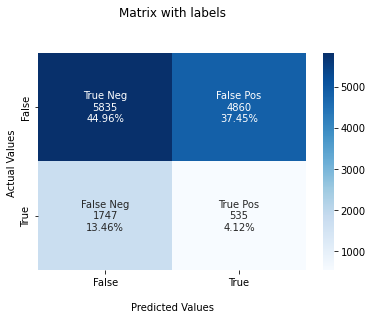

In [41]:
group_names = ['True Neg','False Pos','False Neg','True Pos'] 

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)] 

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Matrix with labels\n\n'); 
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### **IX** Discuss the numbers from 3 Viii and any thoughts on it.

##### **Discussion:** By the confusion matrix we can see that the model has a majority percentage of true negative values, meaning that is predicting the majority of the negative class. But, in the other hand we can also see that the model has a big percentage for false positive values where it basically predicts the incorrectly the nagative class. 

##### that is why with the classification report we can see a low accuracy with 49% which is not very accurate. That is why we have a varely high precision but low recall score followed by insignificantly high f1-score

##### Finally there are alot of misclasification samples

### **X** Show the inertia of the cluster

In [19]:
kmeans.inertia_

49643.86379769514

### **XI** What is the elbow method and what is its purpose of it in the case of KMeans clustering?

##### **Explanation:** The elbow method helps finding the right number of clusters by executiong the K-Means clustering of a dataset for different K values. Then, for each value of K, it calculates the Within-Cluster-Sum-of-Square (WCSS) value. Then it plots graph/curves between WCSS values and the respected number of clusters K. Finally, the sharp point of bend or a point of the plot like an arm, will be considered as the best/optimal value of K

### **XII** Although we just wanted 2 clusters, we still would like to see what will happen if you increase the number of clusters. Plot the inertia for the different numbers of clusters from 2 to 20. 

Text(0, 0.5, 'WCSS')

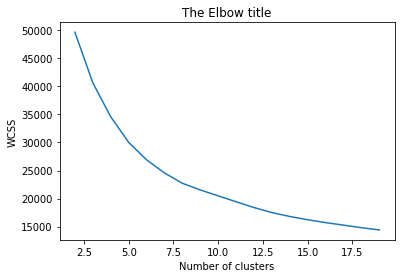

In [20]:
wcss=[]
for i in range(2,20):
  kmeans_cluster = KMeans(i, init = "k-means++")
  kmeans_cluster.fit(X_scaled)
  wcss_iter = kmeans_cluster.inertia_
  wcss.append(wcss_iter)

number_clusters = range(2,20)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

### **XIII** Show a scatter plot with training hours against experience where the points should be colored based on the two cluster labels. Write any thoughts on this plot.

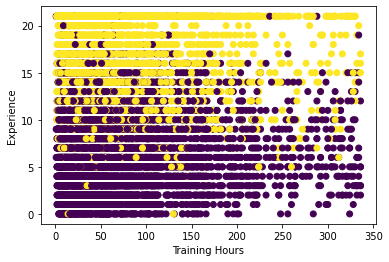

In [44]:
plt.scatter(x=data['training_hours'], y=data['experience'], c=data['cluster_label'])
plt.xlabel("Training Hours")
plt.ylabel("Experience")
plt.show()

##### **Thoughts:** In the plot we can see an increasing number of cluster as the experience goes up and training goes up like a correlation, it almost seems like a separtion betweeen in have between clusters.

### **XIV.** Show a scatter plot with any other two attributes you are interested in like 3 Xiii and add your thoughts on your plot as well

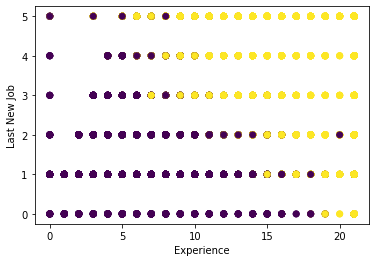

In [45]:
plt.scatter(x=data['experience'], y=data['last_new_job'], c=data['cluster_label'])
plt.xlabel("Experience")
plt.ylabel("Last New Job")
plt.show()

##### **Thoughts:** For this plot it looks like the increase of the last new job also has a "correlation" as the experience increases like a 50/50 division for clusters

---
## 4. AgglomerativeClustering (Helping recourse for the relevant codes
---

### **1.** Plot a dendrogram (make the figure size relatively big, but still you will not be able to see it completely. However, it least this will give you an idea on how many cluster would you like to generate)

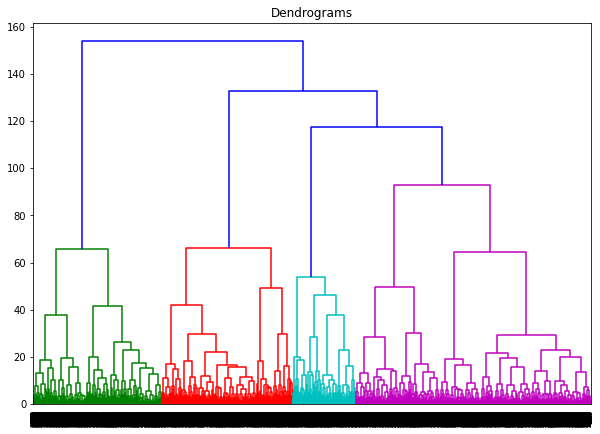

In [23]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))

### **2.** Perform AgglomerativeClustering with 2 clusters first, and use euclidean distance for affinity and linkage = 'ward' 

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster_agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster_agglo.fit_predict(X_scaled)

array([1, 1, 0, ..., 0, 1, 0])

### **3.** After creating the clusters, plot training hours against experience like 3.Xiii and discuss if anything interesting

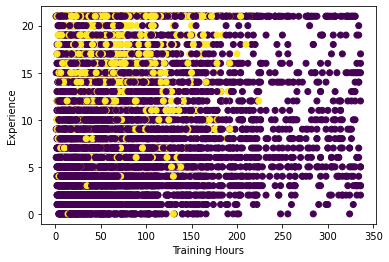

In [35]:
plt.scatter(x=data['training_hours'], y=data['experience'], c=cluster_agglo.labels_)

plt.xlabel("Training Hours")
plt.ylabel("Experience")
plt.show()

##### **Discussion:** Here we can see how clusters are not evenly label making a noticeable to see.

### 4. Then, increase the number of clusters to 4 or 5 and build the clusters again and plot them again to see any difference.

In [48]:
cluster_agglo_inc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster_agglo_inc.fit_predict(X_scaled)

array([1, 1, 0, ..., 0, 1, 0])

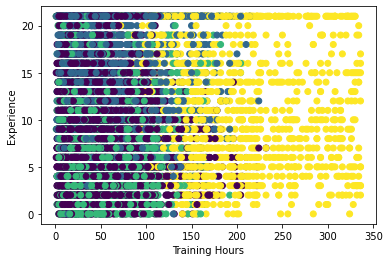

In [49]:
plt.scatter(x=data['training_hours'], y=data['experience'], c=cluster_agglo_inc.labels_)

plt.xlabel("Training Hours")
plt.ylabel("Experience")
plt.show()